In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table, join
import requests
import xml.etree.ElementTree as ET
import re

import astroquery
from astroquery.simbad import Simbad


In [2]:
stem = '/Users/bandari/Documents/git.repos/misc/notebooks_for_development/'

In [3]:
#df = pd.read_csv('neid_planets.csv', delimiter='|', skiprows=43)
neid_targets = Table.read('neid_planets.csv', format='ascii', delimiter='|', data_start=44)

In [4]:
neid_targets

Seq,Name,Vmag,Teff,logg,Delta,Texp,rms,Nobs,FOM,Simbad,_RA,_DE
int64,str9,float64,int64,float64,float64,int64,float64,int64,float64,str6,float64,float64
44,HD145958B,7.5,5343,4.46,5.34,1634,3.1,77,4.114,Simbad,243.32675,13.52805
45,HD99491,6.49,5438,4.4,2.68,724,4.5,125,4.105,Simbad,171.68884,3.0131
46,HD12846,6.89,5700,4.48,2.08,1078,2.9,69,4.097,Simbad,31.62601,24.33399
47,HD164922,6.99,5341,4.39,2.38,1000,3.4,158,4.085,Simbad,270.62859,26.313
48,HD157347,6.3,5712,4.42,1.47,708,3.56,87,4.084,Simbad,260.7137,-2.38818
49,HD149806,7.1,5275,4.42,3.58,1086,4.0,34,4.072,Simbad,249.28512,0.25434
50,HD170657,6.81,5040,4.54,3.19,778,5.15,43,4.058,Simbad,277.829,-18.90881
51,HD199960,6.21,5885,4.22,3.27,1032,4.16,25,4.055,Simbad,315.141,-4.73026
52,HD158633,6.44,5256,4.58,0.71,626,3.0,40,4.042,Simbad,261.25041,67.30671


In [60]:
# Customize the Simbad query to include additional parameters
custom_simbad = Simbad()
custom_simbad.TIMEOUT = 120  # Increase timeout for large queries
#custom_simbad.add_votable_fields('parallax', 'pmra', 'pmdec', 'sp')  # Add desired fields including spectral class
custom_simbad.add_votable_fields('parallax', 'pmra', 'pmdec', 'sp', 'ids')  # Add desired fields including spectral class and identifiers


# Query Simbad using the object names from your table
object_names = neid_targets['Name'] 
neid_target_addl_info = custom_simbad.query_objects(object_names)

# I want the HD designation alone, to enable table merging. 
# This function is to extract the string containing 'HD ' from the 'ids' field
def extract_hd_id(ids):
    for id_str in ids.split('|'):
        if 'HD ' in id_str:
            return id_str
    return None

# make a new col just containing the HD name
neid_target_addl_info['HD_NAME'] = [extract_hd_id(ids) for ids in neid_target_addl_info['IDS']]
# normalize for merging
neid_target_addl_info['HD_NORM'] = [hd.replace(' ', '') for hd in neid_target_addl_info['HD_NAME']]
#neid_target_addl_info['NORM_ID'] = [hd.replace(' ', '') for hd in neid_target_addl_info['SIMBAD_HD']]

# make col of same name to allow merge
neid_targets['HD_NORM'] = neid_targets['Name']

# merged table
neid_target_list_w_addl_info = join(neid_targets, neid_target_addl_info, keys='HD_NORM')


In [61]:
neid_target_list_w_addl_info

Seq,Name,Vmag,Teff,logg,Delta,Texp,rms,Nobs,FOM,Simbad,_RA,_DE,HD_NORM,MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,PLX_VALUE,PLX_PREC,PLX_ERROR,PLX_QUAL,PLX_BIBCODE,PMRA,PMDEC,SP_TYPE,IDS,SCRIPT_NUMBER_ID,HD_NAME
,,,,,,,,,,,,,,,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mas,,mas,,,mas / yr,mas / yr,,,,
int64,str9,float64,int64,float64,float64,int64,float64,int64,float64,str6,float64,float64,str9,object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,int16,float32,str1,object,float64,float64,object,object,int32,str10
78,HD116443,7.35,5001,4.57,2.16,1266,3.71,92,3.938,Simbad,200.92019,2.72527,HD116443,HD 116443,13 23 40.8451,+02 43 30.987,14,14,0.020,0.014,90,A,O,2020yCat.1350....0G,60.316,4,0.0251,A,2020yCat.1350....0G,5.667,201.308,K2V,LTT 13890|** STF 1740B|ADS 8883 B|AG+02 1667|AKARI-IRC-V1 J1323408+024331|ASCC 1138799|BD+03 2766|CCDM J13237+0243B|Ci 18 1727|CNS5 3299|GC 18117|GCRV 64078|GEN# +1.00116443|GJ 3782|GPM 200.920169+02.724783|HD 116443|HIC 65355|HIP 65355|IDS 13186+0314 B|LSPM J1323+0243E|2MASS J13234086+0243309|NLTT 33956|PPM 159722|RAVE J132340.8+024331|SAO 119910|SKY# 24714|SPOCS 565|TIC 393713801|TYC 303-1282-1|UBV 12082|UBV M 19339|USNO-B1.0 0927-00293939|uvby98 100116443|WDS J13237+0243B|WISEA J132340.85+024332.9|WISE J132340.86+024333.2|YZ 2 4709|[K37] 1-7|Gaia DR3 3712538811193759744|Gaia DR1 3712538600739480192|Gaia DR2 3712538811193759744,35,HD 116443
65,HD12051,7.14,5412,4.38,0.97,1206,2.32,232,3.986,Simbad,29.77764,33.20968,HD12051,HD 12051,01 59 06.6332,+33 12 34.859,14,14,0.022,0.019,90,A,O,2020yCat.1350....0G,40.442,4,0.0257,A,2020yCat.1350....0G,243.789,-351.616,G9V,G 72-50|** ENG 9A|** BUP 28A|AG+32 182|AGKR 1742|ASCC 554655|BD+32 360|CCDM J01592+3312A|Ci 20 137|Ci 18 263|CNS5 505|CSI+32 360 1|GC 2382|GCRV 1093|GEN# +1.00012051|G 133-59|GJ 82.1|GPM 29.776932+33.210541|HD 12051|HIC 9269|HIP 9269|IDS 01533+3244 A|LSPM J0159+3312|LTT 10674|2MASS J01590663+3312350|NLTT 6615|PPM 66844|Pul -3 150346|SAO 55167|SKY# 2913|SPOCS 106|TIC 284013790|TYC 2312-2433-1|UBV M 8557|USNO-B1.0 1232-00039073|uvby98 100012051|WDS J01591+3313A|WEB 1946|Gaia DR2 304991163902854784|Gaia DR3 304991163902854784|Gaia DR1 304991159606878336,22,HD 12051
88,HD125455,7.58,5103,4.54,2.65,1606,3.65,45,3.898,Simbad,214.89526,-5.15119,HD125455,HD 125455,14 19 34.8632,-05 09 04.290,14,14,0.027,0.030,90,A,O,2020yCat.1350....0G,48.901,4,0.0445,A,2020yCat.1350....0G,-632.951,-120.707,K1V,LHS 2894|** KUI 67A|AGKR 12806|BD-04 3665|CCDM J14196-0509A|Ci 20 850|CNS5 3540|CSI-04 3665 1|FK5 5266|GC 19326|GCRV 8376|GCRV 26146|GEN# +1.00125455|G 124-24|GJ 544 A|HD 125455|HIC 70016|HIP 70016|IDS 14144-0441 A|JP11 2500|LFT 1092|LPM 520|LTT 5635|2MASS J14193488-0509041|NLTT 36962|PLX 3255|PMC 90-93 3868|PPM 197429|SAO 139867|SKY# 26139|SPOCS 598|SRS 12217|TIC 203230367|TYC 4982-1062-1|UBV 12582|UGP 345|uvby98 100125455|WDS J14196-0509A|WEB 12176|WISEA J141934.43-050905.5|YZC 17 5091|YZ 94 5091|Gaia DR2 3642413746280598784|Gaia DR3 3642413746280598784,45,HD 125455
46,HD12846,6.89,5700,4.48,2.08,1078,2.9,69,4.097,Simbad,31.62601,24.33399,HD12846,HD 12846,02 06 30.2435,+24 20 02.371,14,14,0.018,0.018,90,A,O,2020yCat.1350....0G,42.114,4,0.0205,A,2020yCat.1350....0G,6.063,-147.727,G2V,HD 12846|AG+24 188|AGKR 1839|BD+23 285|CNS5 532|GC 2525|GEN# +1.00012846|GSC 01758-01907|HIC 9829|HIP 9829|IRAS 02036+2405|2MASS J02063024+2420023|PPM 91362|SAO 75144|SKY# 3098|SPOCS 112|TIC 405376575|TYC 1758-1907-1|uvby98 100012846|YZ 24 630|Gaia DR2 104453918172129792|Gaia DR3 104453918172129792,3,HD 12846
91,HD130992,7.81,4767,4.51,2.36,1846,3.17,51,3.879,Simbad,222.9186,-24.30413,HD130992,HD 130992,14 51 40.4651,-24 18 14.876,14,14,0.024,0.021,90,A,O,2020yCat.1350....0G,59.639,4,0.0275,A,2020yCat.1350....0G,-944.623,-431.624,K3.5V,LHS 383|CD-23 11940|CE 498|Ci 20 889|CNS5 3675|CPD-23 5999|GC 19986|GCRV 8631|GEN# +1.00130992|GJ 565|HD 130992|HIC 72688|HIP 72688|LAL 27026|LFT 1149|LPM 54

In [40]:
neid_target_addl_info

KeyError: 'Name'

In [10]:
# Define spectral class properties (example for main-sequence stars)
# (normalized to solar radius)
spectral_to_radius = {
    'O': 6.6,
    'B': 4.2,
    'A': 1.6,
    'F': 1.3,
    'G': 1.0,
    'K': 0.85,
    'M': 0.5
}

# Add a radius column based on the spectral class
def get_radius(spectral_class):
    # Extract the main spectral type (e.g., 'A' from 'A3V')
    main_type = spectral_class[0].upper()
    return spectral_to_radius.get(main_type, np.nan)  # Return NaN if not in the mapping

# Apply the function to the table
neid_target_addl_info['Radius'] = [get_radius(sc) for sc in neid_target_addl_info['SP_TYPE']]  # Replace 'Spectral_Class'

# Save the updated table
#table.write('updated_targets_table_with_radius.csv', format='csv', overwrite=True)

In [11]:
neid_target_addl_info

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,PLX_VALUE,PLX_PREC,PLX_ERROR,PLX_QUAL,PLX_BIBCODE,PMRA,PMDEC,SP_TYPE,SCRIPT_NUMBER_ID,Radius
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,mas,,mas,,,mas / yr,mas / yr,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,float64,int16,float32,str1,object,float64,float64,object,int32,float64
* 49 Ser B,16 13 18.4206,+13 31 40.963,14,14,0.015,0.014,90,A,O,2020yCat.1350....0G,41.154,4,0.0203,A,2020yCat.1350....0G,194.154,-422.438,G9V,1,1.0
* 83 Leo A,11 26 45.3217,+03 00 47.156,14,14,0.019,0.022,90,A,O,2020yCat.1350....0G,55.009,4,0.024,A,2020yCat.1350....0G,-725.963,180.980,G9IV-V,2,1.0
HD 12846,02 06 30.2435,+24 20 02.371,14,14,0.018,0.018,90,A,O,2020yCat.1350....0G,42.114,4,0.0205,A,2020yCat.1350....0G,6.063,-147.727,G2V,3,1.0
HD 164922,18 02 30.8623,+26 18 46.805,14,14,0.010,0.013,90,A,O,2020yCat.1350....0G,45.495,4,0.0167,A,2020yCat.1350....0G,389.772,-602.431,G9V,4,1.0
HD 157347,17 22 51.2877,-02 23 17.439,14,14,0.020,0.013,90,A,O,2020yCat.1350....0G,50.969,4,0.0251,A,2020yCat.1350....0G,48.702,-108.118,G3V,5,1.0
HD 149806,16 37 08.4279,+00 15 15.625,14,14,0.018,0.009,90,A,O,2020yCat.1350....0G,49.204,4,0.0222,A,2020yCat.1350....0G,93.385,78.717,K0V,6,0.85
HD 170657,18 31 18.9610,-18 54 31.729,14,14,0.028,0.028,90,A,O,2020yCat.1350....0G,75.848,4,0.0349,A,2020yCat.1350....0G,-138.215,-195.466,K2V,7,0.85
* 11 Aqr,21 00 33.8408,-04 43 48.934,14,14,0.021,0.014,90,A,O,2020yCat.1350....0G,36.997,4,0.0293,A,2020yCat.1350....0G,48.795,-138.180,G1V,8,1.0


In [45]:
# Ensure the Simbad info and NEID target table have matching identifiers
neid_target_info_merged = neid_target_addl_info.copy()

# Add columns from Simbad results to your table
for col in ['PLX_VALUE', 'PMRA', 'PMDEC', 'SP_TYPE', 'Radius']:  # Adjust based on the fields you requested
    neid_target_info_merged[col] = neid_target_addl_info[col]

# Save the updated table
#merged_table.write('updated_targets_table.csv', format='csv', overwrite=True)

In [41]:
neid_target_info_merged['Name']

KeyError: 'Name'

In [14]:
# distance in pc
neid_target_info_merged['dist'] = 1/(1e-3 * neid_target_info_merged['PLX_VALUE'])

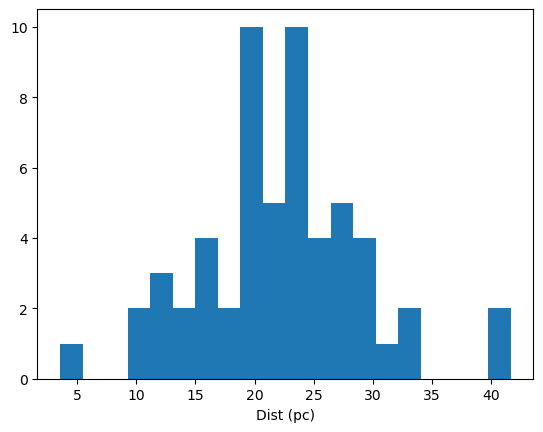

In [20]:
plt.hist(neid_target_info_merged['dist'], bins=20)
plt.xlabel('Dist (pc)')
plt.show()

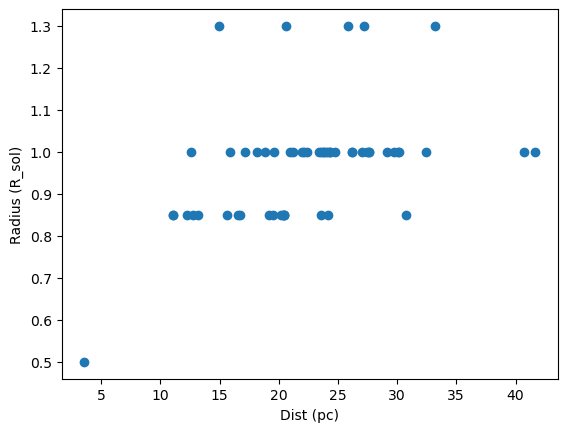

In [16]:
plt.scatter(neid_target_info_merged['dist'], neid_target_info_merged['Radius'])
plt.xlabel('Dist (pc)')
plt.ylabel('Radius (R_sol)')
plt.show()

In [17]:
# find angular widths
neid_target_info_merged['width_ang'] = ( 2 * neid_target_info_merged['Radius'] / neid_target_info_merged['dist'] ) * (1./107.) # arcsec (N.b. 1 AU = 107 R_sol)


In [18]:
neid_target_info_merged['width_ang'][0]

0.0007692429906542055

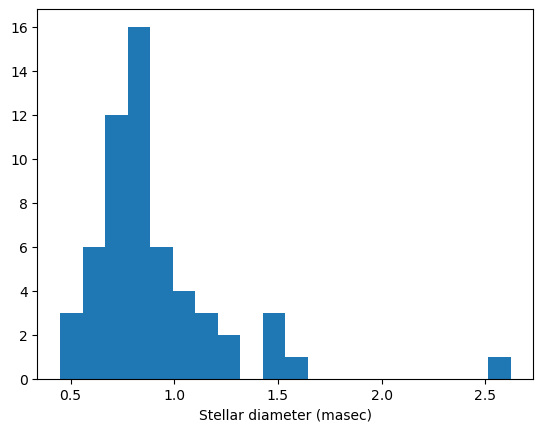

In [19]:
plt.hist(1000 * neid_target_info_merged['width_ang'], bins=20)
plt.xlabel('Stellar diameter (masec)')
plt.show()

In [21]:
# overlap of NEID targets with JMDC catalog (i.e., directly measured angular diameters)

jmdc_catalog = Table.read('jmdc_catalog.csv', format='ascii', delimiter='|', data_start=44)

#jmdc_catalog.csv

In [39]:
# normalize the names of targets in table neid_target_addl_info, to enable matching

# Customize the query fields to include identifiers
Simbad.add_votable_fields('ids')

def get_hd_designation(target_name):
    """
    Queries SIMBAD for a target's identifiers and extracts the HD designation.
    
    Parameters:
        target_name (str): Name of the astronomical target.
    
    Returns:
        str: The HD designation if found, otherwise an informative message.
    """
    try:
        result = Simbad.query_object(target_name)
        if result is None:
            return f"No results found for '{target_name}'."
        
        # Extract identifiers and search for HD designation
        identifiers = result['IDS'][0]
        hd_match = re.search(r'\bHD \d+\b', identifiers)
        if hd_match:
            return hd_match.group(0)
        else:
            return f"No HD designation found for '{target_name}'."
    except Exception as e:
        return f"Error querying SIMBAD for '{target_name}': {e}"

targets = ["49 Ser B", "Betelgeuse", "Vega", "Arcturus"]

# Query each target and display the results
print("Querying SIMBAD for HD designations...\n")
for target in targets:
    hd_designation = get_hd_designation(target)
    print(f"Target: {target} -> {hd_designation}")

    
# Query Simbad for each HD designation in jmdc_catalog
#neid_target_addl_info['SIMBAD_HD'] = [query_simbad_hd(hd) for hd in neid_target_addl_info['MAIN_ID']]

#neid_target_addl_info['NORM_ID'] = neid_target_addl_info['MAIN_ID'].str.replace(' ', '')
#neid_target_addl_info['NORM_ID'] = [hd.replace(' ', '') for hd in neid_target_addl_info['SIMBAD_HD']]




Querying SIMBAD for HD designations...

Target: 49 Ser B -> No HD designation found for '49 Ser B'.
Target: Betelgeuse -> No HD designation found for 'Betelgeuse'.
Target: Vega -> HD 172167
Target: Arcturus -> HD 124897


In [33]:
neid_target_addl_info['SIMBAD_HD']

* 49 Ser B
* 83 Leo A
HD 12846
HD 164922
HD 157347
HD 149806
HD 170657
* 11 Aqr
HD 158633
HD 166620
HD 39881


In [24]:
type(neid_target_addl_info)

astropy.table.table.Table

In [ ]:
# Customize the Simbad query to include additional parameters
custom_simbad = Simbad()
custom_simbad.TIMEOUT = 120  # Increase timeout for large queries
custom_simbad.add_votable_fields('parallax', 'pmra', 'pmdec', 'sp')  # Add desired fields including spectral class

# Query Simbad using the object names from your table
object_names = neid_targets['Name']  # Replace 'Identifier' with your column name
neid_target_addl_info = custom_simbad.query_objects(object_names)

In [22]:
jmdc_catalog

ID1,ID2,UDdiam,LDdiam,e_LDdiam,Band,mu-lambda,Method,BandCode,Notes,BibCode,SINPE,CADARS,SimbadName,_RA,_DE
str28,str28,float64,float64,float64,str10,float64,int64,int64,str204,str19,int64,int64,str28,float64,float64
HD102212,* nu. Vir,5.2,--,--,5470A,--,2,3,--,1971HiA.....2..675R,0,9,HD102212,176.46483,6.52937
HD219215,PHI AQR,4.9,--,0.8,5470A,--,2,3,--,1971HiA.....2..692P,0,4,HD219215,348.58067,-6.049
HD91232,46 LEO,5.6,--,1.1,5470A,--,2,3,--,1971HiA.....2..692P,0,6,HD91232,158.04906,14.13727
HD23629,24 TAU,10.0,--,--,5470A,--,2,3,--,1971HiA.....2..700B,0,2,HD23629,56.83766,24.11627
HD87901,ALF LEO,1.7,--,0.5,5470A,--,2,3,--,1971HiA.....2..700B,0,16,HD87901,152.09296,11.96721
HD144218,BET02 SCO,0.2,--,--,B,--,2,2,"Occultation by Io, found binary.",1971Natur.234..405T,0,4,HD144218,241.36072,-19.80191
HD64705,--,0.05,--,--,B,--,2,2,--,1971PASP...83..156M,0,1,HD64705,119.02688,23.62381
HD169916,LAM SGR,4.2,--,0.3,--,--,2,--,"Nather, R.E.: 1972, Ph.D.Dissertation, University Cape Town",1972...............,0,5,HD169916,276.99267,-25.4217
HD144218,* bet02 Sco,0.16,--,0.05,V,--,2,3,--,1972AJ.....77...60B,0,4,HD144218,241.36072,-19.80191


In [ ]:
# overlap of transiting planets with JMDC catalog (i.e., directly measured angular diameters)